In [1]:
import numpy as np
import pandas as pd
import math
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import warnings
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
warnings.filterwarnings("ignore")

In [2]:
# pasta = '/mnt/HD_500GB_WD/historia2/'
pasta = '/media/andre/SAMSUNG/03_HD_500GB_WD/historia2/'

## Abrindo os .pkl com irradiancias corrigidas diarias de 2014 e de 2015 COM FILTRO NAS IRRADS CORRIGIDAS:
irrads14 = pd.read_pickle(pasta+'irradiancias_corrigidas_diarias_model4_2014_comfiltro_final.pkl')
irrads15 = pd.read_pickle(pasta+'irradiancias_corrigidas_diarias_model4_2015_comfiltro_final.pkl')
limitesy1 = [600.0, 820.0]
limitesy2 = [-120.0, 120.0]

In [3]:
irradsGoAmazon = list(irrads14.loc['irrad_corrigido'].values)+list(irrads15.loc['irrad_corrigido'].values)

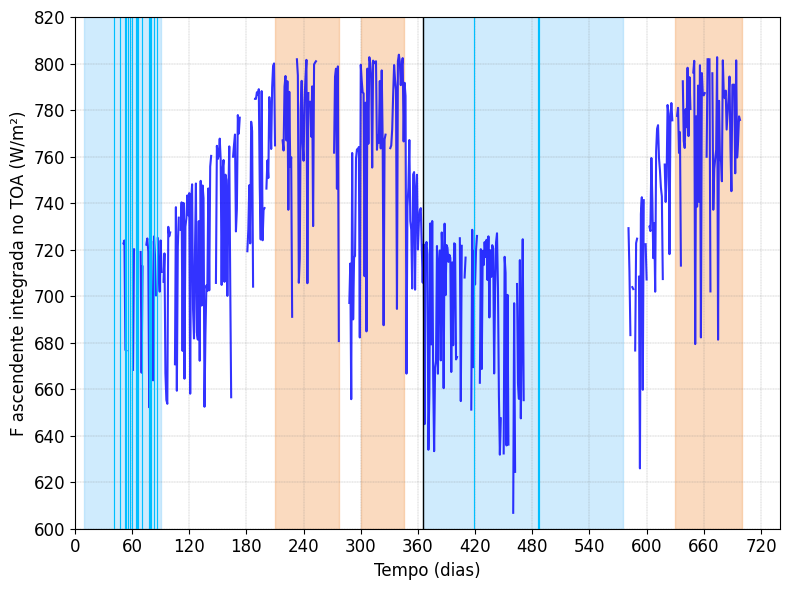

In [4]:
fig, ax = plt.subplots(figsize=(8, 6), facecolor='white')
tf = 12
cores = ['blue', 'saddlebrown']
limitesx = [0, 740]
limitesy = limitesy1
plt.setp(ax.get_xticklabels(), rotation=0, horizontalalignment='center', fontsize=tf, color='black')
plt.setp(ax.get_yticklabels(), rotation=0, horizontalalignment='right', fontsize=tf, color='black')
ax.set_xlabel('Tempo (dias)', fontsize=tf)
ax.set_ylabel('F ascendente integrada no TOA (W/m²)', fontsize=tf)
ax.grid(axis='both', linestyle='--', linewidth=0.22, color='grey')
ax.set(xlim=limitesx, ylim=limitesy, facecolor='white')
ax.xaxis.set_major_locator(ticker.MultipleLocator(60))
ax.yaxis.set_major_locator(ticker.MultipleLocator(20))

ax.plot(np.arange(len(irradsGoAmazon)), irradsGoAmazon, color=cores[0], alpha=0.8, linewidth=1.5)
# ax.legend(loc='best', frameon=True, fontsize=tf+1, ncol=1, fancybox=True, shadow=True)

ax.vlines(x=365, ymin=limitesy[0], ymax=limitesy[1], colors='black', linewidth=1.00)


### Pintando os dias dos cenários limpo e poluído, segundo o método da clusterização, de 2014:
dias_fundo_n = [41, 47, 53, 54, 56, 58, 60, 64, 65, 66, 70, 78, 79, 80, 83, 86]
ax.axvspan(xmin=10, xmax=90, color='lightskyblue', alpha=0.4)
ax.axvspan(xmin=210, xmax=277, color='sandybrown', alpha=0.4)
ax.axvspan(xmin=300, xmax=345, color='sandybrown', alpha=0.4)
for j in dias_fundo_n:
    ax.vlines(x=j, ymin=limitesy1[0], ymax=limitesy1[1], colors='deepskyblue', linewidth=0.85)

### Pintando os dias dos cenários limpo e poluído, segundo o método da clusterização, de 2015:
n14 = 364
dias_fundo_n_2015 = [n14+55, n14+122, n14+123]
ax.axvspan(xmin=365, xmax=365+210, color='lightskyblue', alpha=0.4)
ax.axvspan(xmin=365+265, xmax=365+335, color='sandybrown', alpha=0.4)
for j in dias_fundo_n_2015:
    ax.vlines(x=j, ymin=limitesy1[0], ymax=limitesy1[1], colors='deepskyblue', linewidth=0.85)
    
plt.tight_layout()
# plt.savefig('/mnt/HD_500GB_WD/historia2/Z-Copia_Notebooks_selecionados-Final/FcorrigidasIntegrados_GoAmazon.png',
#                     dpi=400, bbox_inches='tight', facecolor='white')

In [5]:
###############################################

In [6]:
### Dias + limpos (vem do "Descobrindo_dias_pluma_clusters.ipynb") - Modelo 2 (clusterização) - 2014:
# dias_fundo = ['11/02/2014', '17/02/2014', '23/02/2014', '24/02/2014', '26/02/2014', '28/02/2014', '02/03/2014',
#               '06/03/2014', '07/03/2014', '08/03/2014', '12/03/2014', '20/03/2014', '21/03/2014', '22/03/2014',
#               '25/03/2014', '28/03/2014']
dias_fundo_n = [41, 47, 53, 54, 56, 58, 60, 64, 65, 66, 70, 78, 79, 80, 83, 86]

### Dias + limpos (vem do "Descobrindo_dias_pluma_clusters.ipynb") - Modelo 2 (clusterização) - 2015:
# dias_fundo15 = ['25/02/2015', '03/05/2015', '04/05/2015']
dias_fundo_n15 = [55, 122, 123]

In [7]:
irrad_min14_15 = np.nanmean(list(irrads14.T.iloc[dias_fundo_n]['irrad_corrigido'])+list(irrads15.T.iloc[dias_fundo_n15]['irrad_corrigido']))
irrad_min14_15

689.9428013609318

In [28]:
forcantes14_refconjunta = []
for e in irrads14.loc['irrad_corrigido']:
    forcantes14_refconjunta.append(irrad_min14_15-e)

In [29]:
forcantes15_refconjunta = []
for e in irrads15.loc['irrad_corrigido']:
    forcantes15_refconjunta.append(irrad_min14_15-e)

In [30]:
forcantesGoAmazon_refconjunta = forcantes14_refconjunta+forcantes15_refconjunta

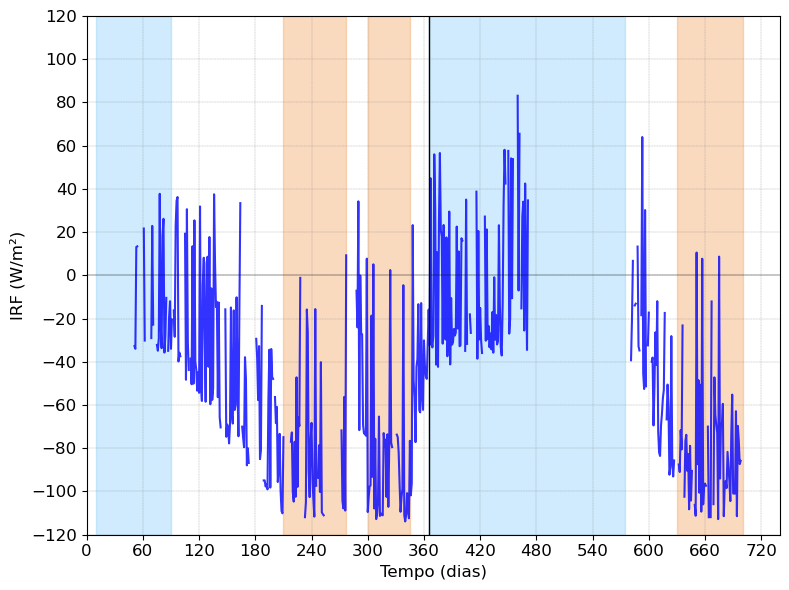

In [42]:
###### Forçantes (clusterização) com referência de período limpo conjunta, ou seja, média dos dias mais limpos
###### de 2014 + os dias mais limpos de 2015:
fig, ax = plt.subplots(figsize=(8, 6), facecolor='white')
tf = 12
cores = ['blue', 'saddlebrown']
limitesx = [0, 740]
limitesy = limitesy2
plt.setp(ax.get_xticklabels(), rotation=0, horizontalalignment='center', fontsize=tf, color='black')
plt.setp(ax.get_yticklabels(), rotation=0, horizontalalignment='right', fontsize=tf, color='black')
# ax.set_title("Instantaneous Radiative Forcings for Stratiform Clouds at T3 site - GoAmazon", fontsize=tf+2)
ax.set_xlabel('Tempo (dias)', fontsize=tf)
ax.set_ylabel('IRF (W/m²)', fontsize=tf)
ax.grid(axis='both', linestyle='--', linewidth=0.22, color='grey')
ax.set(xlim=limitesx, ylim=limitesy, facecolor='white')
ax.xaxis.set_major_locator(ticker.MultipleLocator(60))
ax.yaxis.set_major_locator(ticker.MultipleLocator(20))

# ax.plot(np.arange(len(forcantesGoAmazon_refconjunta)), forcantesGoAmazon_refconjunta, color=cores[0],
#         label='Clouds with LWC $ϵ$ [0.2;0.4]g/m³', alpha=0.8, linewidth=1.5)
# ax.legend(loc='best', frameon=True, fontsize=tf+1, ncol=1, fancybox=True, shadow=True)]
ax.plot(np.arange(len(forcantesGoAmazon_refconjunta)), forcantesGoAmazon_refconjunta, color=cores[0],
        alpha=0.8, linewidth=1.5)
    
ax.vlines(x=365, ymin=limitesy[0], ymax=limitesy[1], colors='black', linewidth=1.00)
ax.hlines(y=0.0, xmin=limitesx[0], xmax=limitesx[1], colors='black', linewidth=0.25)

### Pintando os dias dos cenários limpo e poluído, segundo o método da clusterização, de 2014:
dias_fundo_n = [41, 47, 53, 54, 56, 58, 60, 64, 65, 66, 70, 78, 79, 80, 83, 86]
ax.axvspan(xmin=10, xmax=90, color='lightskyblue', alpha=0.4)
ax.axvspan(xmin=210, xmax=277, color='sandybrown', alpha=0.4)
ax.axvspan(xmin=300, xmax=345, color='sandybrown', alpha=0.4)

### Pintando os dias dos cenários limpo e poluído, segundo o método da clusterização, de 2015:
n14 = 364
dias_fundo_n_2015 = [n14+55, n14+122, n14+123]
ax.axvspan(xmin=365, xmax=365+210, color='lightskyblue', alpha=0.4)
ax.axvspan(xmin=365+265, xmax=365+335, color='sandybrown', alpha=0.4)
    
plt.tight_layout()

# plt.savefig('/mnt/HD_500GB_WD/historia2/Z-Copia_Notebooks_selecionados-Final/FcorrigidasIntegrados_GoAmazon.png',
#                     dpi=400, bbox_inches='tight', facecolor='white')
plt.savefig('/media/andre/SAMSUNG/03_HD_500GB_WD/historia2/Z-Copia_Notebooks_selecionados-Final/IRFs_GoAmazon_12LT.png',
                    dpi=400, bbox_inches='tight', facecolor='white')

In [38]:
#########################################################################################

In [39]:
dias_goamazon = list(irrads14.columns)+list(irrads15.columns)

In [40]:
dic = {'dia':dias_goamazon, 'IRF_12LT':forcantesGoAmazon_refconjunta}
forcantes = pd.DataFrame(data=dic)
forcantes

,dia,IRF_12LT
0,01/01/2014,NaN
1,02/01/2014,NaN
2,03/01/2014,NaN
3,04/01/2014,NaN
4,05/01/2014,NaN
...,...,...
725,27/12/2015,NaN
726,28/12/2015,NaN
727,29/12/2015,NaN
728,30/12/2015,NaN


In [41]:
### Convertendo os dataframes finais (os na lista "dfs") para ".pkl" (tipo pikcle) e salvando eles numa pasta:
# directory = '/mnt/HD_500GB_WD/historia2/'
directory = '/media/andre/SAMSUNG/03_HD_500GB_WD/historia2/'

forcantes.to_pickle(directory+'forcantesGoAmazon_refconjunta_diarias_model4_comfiltro_12LT.pkl')